### Precision - Recall
TP: 옳은 검출<br>
FP: 틀린 검출<br>
FN: 검출되어야 할 것이 검출되지 않음<br>
TN: 검출되지 말아야할 것이 검출되지 않음<br>

정확도 = 내가 검출한 것중 제대로 한것 = TP / (TP + FP)<br>
재현율 = 검출됐어야 할 모든 정답중에 옳게 검출한 것들 = TP / (TP + FN)<br>

### R-CNN
Region Proposal<br>
Object Classfication


## Two-stage detector
### Fast R-CNN
- R-CNN의 경우에는 각각의 제안된 영역에 대해 독립적으로 CNN을 통과시켜야 했기 때문에 처리 시간이 오래걸렸음
- Fast R-CNN은 모든 제안 영역을 개별적으로 모델에 넣지 말고, 먼저 합성곱 신경망을 통해 특징 맵을 생성한 후 특징 맵에서 제안받은 영역을 따로 분리하여 분류할 것을 제안

#### 영역 제안 네트워크(RPN)
- Faster R-CNN에서는 영역제안 방식을 선택적 영역 알고리즘을 사용하지 않고, **영역 제안 네트워크**라는 새로운 딥러닝 기반의 방식을 도입
<br>**앵커 박스**<br>
- Faster R-CNN의 RPN은 여러 사이즈와 비율을 가진 고정된 사각형 박스, 즉 '앵커 박스'를 사용하여 이미지의 모든 위치에 대해 정의
- RPN에서 앵커 박스는 크게 두가지 작업을 진행

1. 이진 분류(Objectness 점수)
- Objectness 점수는 특정 앵커가 객체를 포함할 확률을 의미
- RPN에서는 각 앵커가 배경인지 어떤 객체의 일부인지를 구분하기 위해 이 Objectness 점수를 사용
- 배경: 앵커 내에 특정 객체가 없거나 객체의 작은 부분만 포함되어 있는 경우, 이 앵커는 배경으로 분류
- 객체: 앵커 내에 객체의 중요한 부분이나 큰 부분이 포함되어 있으면, 해당 앵커는 포그라운드 또는 객체로 분류


## one-stage detector
### YOLO
- YOLO는 탐지하고자 하는 객체의 정보와 객체 위치를 한 번에 예측하는 통합예측 시스템을 제작
- 이미지 전체의 특징을 한 번에 추출하기 때문에 이미지 전체 맥락에 대한 이해가 높고 background error가 낮음
- YOLO의 핵심 아이디어 중 하나는 통합 예측

#### 그리드 분할
- 그리드는 이미지나 다른 2차원 표면을 일정한 사이즈의 정사각형 또는 직사각형으로 분할
- 그리드는 복잡한 이미지나 데이터를 더 작고 관리하기 쉬운 여러 부분으로 나누는 데 도움을 줌
- 먼저 첫번재로 이미지를 S x S 개의 그리드로 나누는 작업을 진행

In [4]:
%cd /content
!rm -rf darknet
!git clone https://github.com/pjreddie/darknet
%cd darknet
!make
!ls -al darknet
!./darknet

/content
Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955 (from 1)
Receiving objects: 100% (5955/5955), 6.37 MiB | 13.68 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.
/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/co

In [11]:
%cd /content/darknet
!wget https://pjreddie.com/media/files/yolov3.weights

/content/darknet
--2025-04-30 06:00:17--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 104.21.88.156, 172.67.185.199, 2606:4700:3037::6815:589c, ...
Connecting to pjreddie.com (pjreddie.com)|104.21.88.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘yolov3.weights’

yolov3.weights          [ <=>                ]   8.88K  --.-KB/s    in 0s      

2025-04-30 06:00:18 (102 MB/s) - ‘yolov3.weights’ saved [9093]



/content/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8      

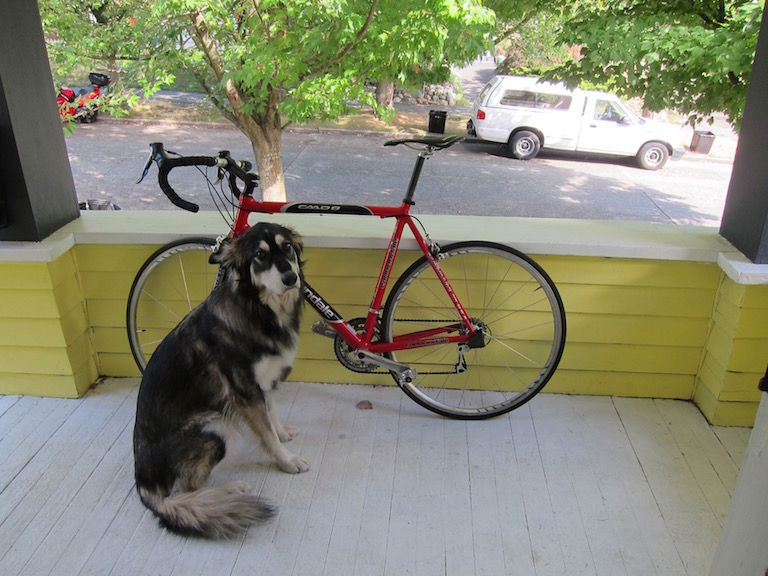

In [12]:
%cd /content/darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

from IPython.display import Image
Image('predictions.jpg')